## Predict the number row

In [1]:
import numpy as np

IN_DIM = 3
H_DIM = 2
OUT_DIM = 1

ALPHA = 0.01
NUM_EPOCHS = 10


dataset = [(np.array([1, 2, 3]), 4),
           (np.array([2, 3, 4]), 5),
           (np.array([3, 4, 5]), 6),
           (np.array([4, 5, 6]), 7),
           (np.array([5, 6, 7]), 8),
           (np.array([6, 7, 8]), 9)]

# weights
W1 = np.random.randn(IN_DIM, H_DIM)
W2 = np.random.randn(H_DIM)


In [173]:
# used to turn off some of the weights. resulting [0, inf]
def relu(s):
    return np.maximum(s, 0)


def relu_deriv(s):
    return 1 if s >= 0 else 0


# used to predict probability. resulting [0, 1]
def sigmoid(s):
    return 1 / (1 + np.exp(-s))


def sigmoid_deriv(s):
    return s * (1 - s)


def predict(x):
    s1 = x @ W1  # @ - умножение матрицы на вектор
    h = relu(s1) # hidden layer result
    s2 = h @ W2
    y = sigmoid(s2) * 10  # apply func
    return y


# learning

loss = []

for e in range(NUM_EPOCHS):
    # random.shuffle(dataset)
    for i in range(len(dataset)):
        x, result = dataset[i]
        print('x', x)
        # forward
        print('W1', W1)
        s1 = x @ W1
        print('  s1', s1)
        h = relu(s1)
        print('     h', h)
        print('       W2', W2)
        s2 = h @ W2
        print('         s2', s2)
        y = sigmoid(s2) * 10
        print('->y', y)
        
        E = np.square(y - result) # mean squared error
        print(E)

        # backward - using the derevative (gradient) to know the direction to go to reduce the error

        ds2 = 2 * (result - y) * sigmoid_deriv(s2) # value * sigmo'(s2)
        print('        ds2', ds2)
        dW2 = h.T * ds2           # (valid) 
        print('      dW2', dW2)

        dh = ds2 * W2.T            # (valid) vector * matrix.T = vector
        print('     dh', dh)

        ds1 = dh * list(map(relu_deriv, s1))  # (valid) vector * relu'(vector) = vector
        print('  ds1', ds1)
        dW1 = np.outer(x.T, ds1)            # (valid) vector.T * vector = matrix
        print('dW1', dW1)

        # update
        W2 -= ALPHA * dW2
        # W2 -= ALPHA * np.reshape(dW2, (2, -2))
        W1 -= ALPHA * dW1

        loss.append(E)


x [1 2 3]
W1 [[ 0.40581805 -0.3289802 ]
 [-0.51942017 -1.08352826]
 [-1.04895658 -0.84438012]]
  s1 [-3.77989202 -5.02917708]
     h [0. 0.]
       W2 [ 1.13567175 -0.43289148]
         s2 0.0
->y 5.0
1.0
        ds2 -0.0
      dW2 [-0. -0.]
     dh [-0.  0.]
  ds1 [-0.  0.]
dW1 [[-0.  0.]
 [-0.  0.]
 [-0.  0.]]
x [2 3 4]
W1 [[ 0.40581805 -0.3289802 ]
 [-0.51942017 -1.08352826]
 [-1.04895658 -0.84438012]]
  s1 [-4.94245072 -7.28606565]
     h [0. 0.]
       W2 [ 1.13567175 -0.43289148]
         s2 0.0
->y 5.0
0.0
        ds2 0.0
      dW2 [0. 0.]
     dh [ 0. -0.]
  ds1 [ 0. -0.]
dW1 [[ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]]
x [3 4 5]
W1 [[ 0.40581805 -0.3289802 ]
 [-0.51942017 -1.08352826]
 [-1.04895658 -0.84438012]]
  s1 [-6.10500942 -9.54295423]
     h [0. 0.]
       W2 [ 1.13567175 -0.43289148]
         s2 0.0
->y 5.0
1.0
        ds2 0.0
      dW2 [0. 0.]
     dh [ 0. -0.]
  ds1 [ 0. -0.]
dW1 [[ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]]
x [4 5 6]
W1 [[ 0.40581805 -0.3289802 ]
 [-0.51942017 -1.0835282

In [160]:
x = np.array([1, 2, 3])

probs = predict(x)
print('Predicted: ', probs)


Predicted:  nan


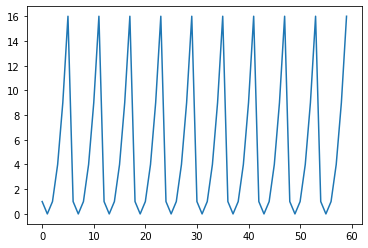

In [174]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.show()
